### Importing Dependencies

In [39]:
import numpy as np
import pandas as pd
from PIL import Image 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Exploration

In [9]:
# reading the image file
img = Image.open('./images/sample_img1.jpg')

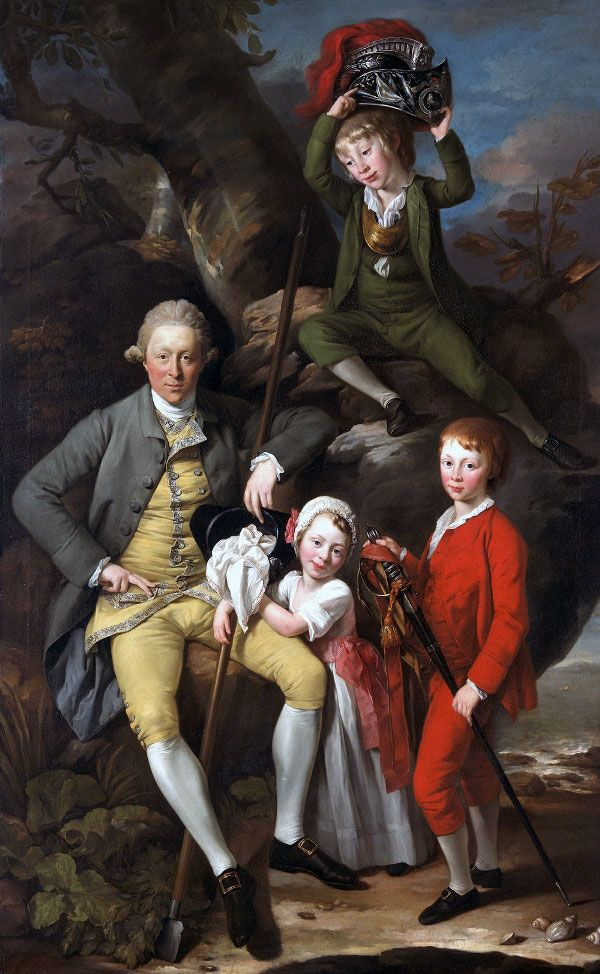

In [10]:
# showing the image file
img

In [11]:
# size of the image
width, height = img.size
print(f'''Height of the image: {height} px
width of the image: {width} px''')

Height of the image: 974 px
width of the image: 600 px


In [12]:
# converting to array
img_mat = np.array(img)
img_mat

array([[[34, 32, 33],
        [33, 31, 32],
        [28, 26, 27],
        ...,
        [66, 78, 90],
        [66, 78, 90],
        [64, 76, 88]],

       [[31, 29, 30],
        [32, 30, 31],
        [20, 18, 19],
        ...,
        [71, 83, 95],
        [72, 84, 96],
        [71, 83, 95]],

       [[36, 34, 35],
        [41, 39, 40],
        [21, 19, 20],
        ...,
        [70, 82, 96],
        [72, 84, 98],
        [71, 83, 97]],

       ...,

       [[42, 29, 36],
        [51, 40, 44],
        [33, 21, 23],
        ...,
        [12,  6,  6],
        [10,  6,  5],
        [10,  6,  5]],

       [[42, 31, 39],
        [51, 42, 47],
        [31, 20, 24],
        ...,
        [11,  7,  8],
        [12,  8,  9],
        [13,  9, 10]],

       [[39, 29, 37],
        [50, 41, 46],
        [29, 20, 25],
        ...,
        [11,  7,  8],
        [12,  8,  9],
        [13,  9, 10]]], dtype=uint8)

In [13]:
# shape of the array
img_mat.shape

(974, 600, 3)

In [15]:
# converting image into a dataframe where rows represents pixels and columns represenrs R, G, B value 
img_df = pd.DataFrame(img_mat.reshape(height*width, 3), columns=["Red", "Green", "Blue"])
img_df

,Red,Green,Blue
0,34,32,33
1,33,31,32
2,28,26,27
3,32,30,31
4,27,25,26
...,...,...,...
584395,11,7,6
584396,11,7,8
584397,11,7,8
584398,12,8,9


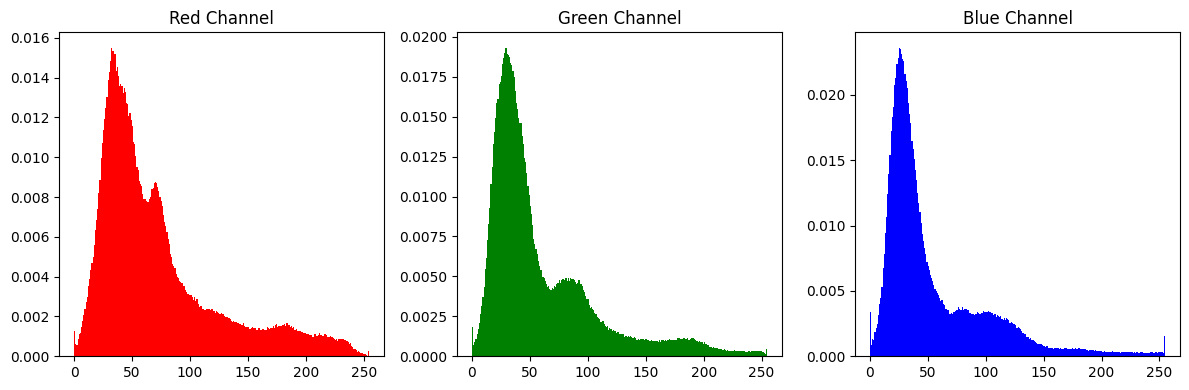

In [24]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the histogram for the Red channel
axs[0].hist(img_df.iloc[:, 0], bins=256, density=True, color='red')
axs[0].set_title('Red Channel')

# Plot the histogram for the Green channel
axs[1].hist(img_df.iloc[:, 1], bins=256, density=True, color='green')
axs[1].set_title('Green Channel')

# Plot the histogram for the Blue channel
axs[2].hist(img_df.iloc[:, 2], bins=256, density=True, color='blue')
axs[2].set_title('Blue Channel')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [57]:
# extracting the dominating colors
numcol = 6
model = KMeans(n_clusters=numcol)
model.fit(img_df)

colors = [tuple(x) for x in model.cluster_centers_.astype(int)]
colors

g:\All Docs\Sayan\Desktop\Color Pallete Generator\cpgenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[(30, 24, 22),
 (211, 201, 185),
 (62, 47, 41),
 (91, 88, 88),
 (157, 48, 30),
 (156, 138, 117)]

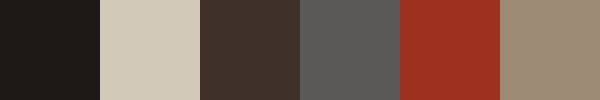

In [62]:
# using the dominationg colors to create the pallatte
combined_color_pallete = Image.new('RGB', (numcol*100, 100)) 
position = 0
for color in colors:
    color_img = Image.new('RGB', (100, 100), color)
    combined_color_pallete.paste(color_img, (position, 0))
    position += 100

combined_color_pallete

In [69]:
# getting the hex codes of the dominating colors
get_hex = lambda x: hex(x).split("x")[1]
col_hex = [f'#{get_hex(color[0])}{get_hex(color[1])}{get_hex(color[2])}' for color in colors]
col_hex

['#1e1816', '#d3c9b9', '#3e2f29', '#5b5858', '#9d301e', '#9c8a75']

In [104]:
# creating a class to extract and build pallatte
class Pallette:
    def __init__(self, path, ncol=6):
        self.img_oject = Image.open(path)
        self.height = self.img_oject.size[1]
        self.width = self.img_oject.size[0]
        self.n_pix = self.height*self.width
        self.col_array = np.array(self.img_oject).reshape(self.n_pix, 3)
        self.ncol = ncol
        self.colors = self.get_dominating_cols()
        self.pallete = self.create_pallete()
        self.hex_vals = self.get_hex()

    def get_dominating_cols(self):
        '''method for extracting colors'''
        model = KMeans(n_clusters=self.ncol)
        model.fit(self.col_array)
        colors = [tuple(x) for x in model.cluster_centers_.astype(int)]
        return colors
    
    def create_pallete(self):
        '''method for creating pallette'''
        pallatte_size = 100
        pallatte = Image.new('RGB', (self.ncol*pallatte_size, pallatte_size))

        position = 0
        for col in self.colors:
            current_col = Image.new('RGB', (pallatte_size, pallatte_size), col)
            pallatte.paste(current_col, (position,  0))
            position += pallatte_size
        
        return pallatte

    def get_hex(self):
        '''method for getting the hex code'''
        col_hex = lambda x: hex(x).split("x")[1]
        hex_vals = [f'#{col_hex(col[0])}{col_hex(col[1])}{col_hex(col[2])}' for col in self.colors]
        return hex_vals
    

### Testing on the other image

In [106]:
im = Pallette('./images/sample_img2.jpg')

g:\All Docs\Sayan\Desktop\Color Pallete Generator\cpgenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


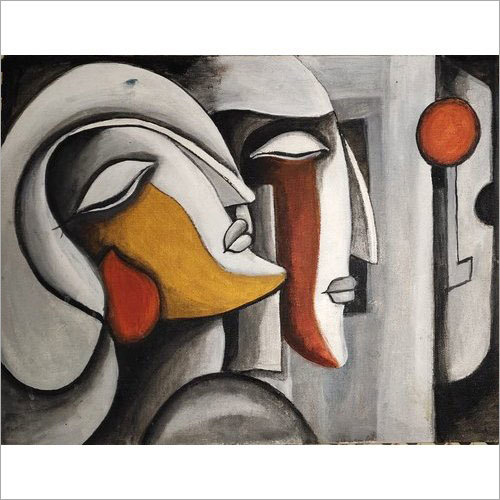

In [108]:
im.img_oject

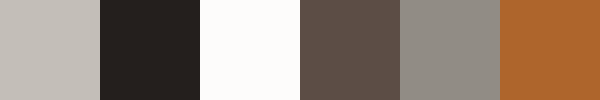

In [107]:
im.pallete